In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset - Inner join on Mouse ID
df = pd.merge(mouse_data, trial_data, on='Mouse ID', how='inner')

# Only keep data for Capomulin, Infubinol, Ketapril, and Placebo
df = df.loc[df['Drug'].isin(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']),:]

# Display the data table for preview
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean_data = df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean_data)

# Reset index
tumor_mean_df  = tumor_mean_df.reset_index() 

# Preview DataFrame
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se_data = df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']
                 
# Convert to DataFrame
tumor_se_df = pd.DataFrame(tumor_se_data)

# Reset index
tumor_se_df  = tumor_se_df.reset_index() 

# Preview DataFrame
tumor_se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames - Mean
# Set timepoint as index, drug as columns, mean as table values
tumor_mean = tumor_mean_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_mean.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [5]:
# Minor Data Munging to Re-Format the Data Frames - Standard Error
# Set timepoint as index, drug as columns, se as table values
tumor_se = tumor_se_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_se.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


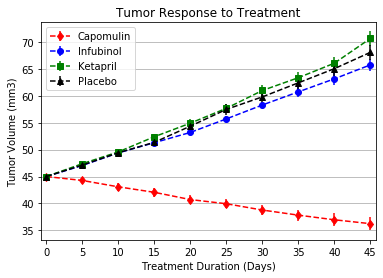

In [6]:
# Generate the Plot (with Error Bars) - Capomulin, Infubinol, Ketapril, and Placebo
plt.errorbar(tumor_mean.index,tumor_mean['Capomulin'],yerr=tumor_se['Capomulin'],fmt='rd--',label='Capomulin')
plt.errorbar(tumor_mean.index,tumor_mean['Infubinol'],yerr=tumor_se['Infubinol'],fmt='bo--',label='Infubinol')
plt.errorbar(tumor_mean.index,tumor_mean['Ketapril'],yerr=tumor_se['Ketapril'],fmt='gs--',label='Ketapril')
plt.errorbar(tumor_mean.index,tumor_mean['Placebo'],yerr=tumor_se['Placebo'],fmt='k^--',label='Placebo')

plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.xlim(min(tumor_mean.index)-0.75,max(tumor_mean.index)+0.75)
plt.ylim(min(tumor_mean[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']].min())-3,
                    max(tumor_mean[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']].max())+3)
plt.legend(loc="best")
plt.grid(axis='y')
plt.xticks(np.arange(0,50,5))

# Save the Figure
plt.savefig('Tumor Response to Treatment.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean_data = df.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
metastatic_mean_df = pd.DataFrame(metastatic_mean_data)

# Reset index
metastatic_mean_df  = metastatic_mean_df.reset_index() 

# Preview DataFrame
metastatic_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_se_data = df.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
                 
# Convert to DataFrame
metastatic_se_df = pd.DataFrame(metastatic_se_data)

# Reset index
metastatic_se_df  = metastatic_se_df.reset_index() 

# Preview DataFrame
metastatic_se_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames - Mean
# Set timepoint as index, drug as columns, mean as table values
metastatic_mean = metastatic_mean_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_mean.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [10]:
# Minor Data Munging to Re-Format the Data Frames - Standard Error
# Set timepoint as index, drug as columns, se as table values
metastatic_se = metastatic_se_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_se.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


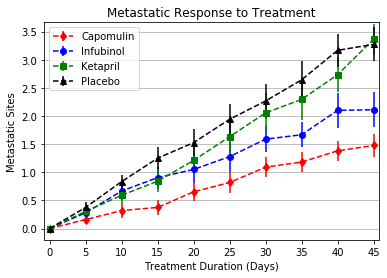

In [11]:
# Generate the Plot (with Error Bars) - Capomulin, Infubinol, Ketapril, and Placebo
plt.errorbar(metastatic_mean.index,metastatic_mean['Capomulin'],yerr=metastatic_se['Capomulin'],fmt='rd--',label='Capomulin')
plt.errorbar(metastatic_mean.index,metastatic_mean['Infubinol'],yerr=metastatic_se['Infubinol'],fmt='bo--',label='Infubinol')
plt.errorbar(metastatic_mean.index,metastatic_mean['Ketapril'],yerr=metastatic_se['Ketapril'],fmt='gs--',label='Ketapril')
plt.errorbar(metastatic_mean.index,metastatic_mean['Placebo'],yerr=metastatic_se['Placebo'],fmt='k^--',label='Placebo')

plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Response to Treatment')
plt.xlim(min(metastatic_mean.index)-0.75,max(metastatic_mean.index)+0.75)
plt.ylim(min(metastatic_mean[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']].min()-0.2),
                    max(metastatic_mean[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']].max())+0.3)
plt.legend(loc="best")
plt.grid(axis='y')
plt.xticks(np.arange(0,50,5))

# Save the Figure
plt.savefig('Metastatic Response to Treatment.png')

# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = df.groupby(['Drug','Timepoint']).count()['Mouse ID']

# Convert to DataFrame
survival_df = pd.DataFrame(survival_count)

# Rename Mouse ID as Mouse Count
survival_df = survival_df.rename(columns={'Mouse ID':'Mouse Count'})

# Calculate survival rates
survival_df['Survival Rate'] = survival_df['Mouse Count']/survival_df['Mouse Count'][0]*100

# Reset index
survival_df  = survival_df.reset_index() 

# Preview DataFrame
survival_df.head()

,Drug,Timepoint,Mouse Count,Survival Rate
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


In [13]:
# Minor Data Munging to Re-Format the Data Frames - Count
# Set timepoint as index, drug as columns, count as table values
survival_count = survival_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview that Reformatting worked
survival_count.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


In [14]:
# Minor Data Munging to Re-Format the Data Frames - Rate
# Set timepoint as index, drug as columns, count as table values
survival_rate = survival_df.pivot(index='Timepoint', columns='Drug', values='Survival Rate')

# Preview that Reformatting worked
survival_rate.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


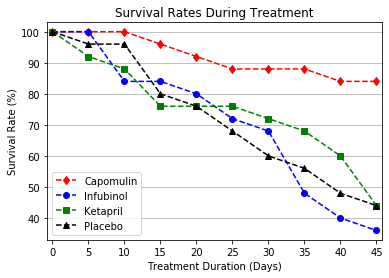

In [15]:
# Generate the Plot (with Error Bars) - Capomulin, Infubinol, Ketapril, and Placebo
plt.errorbar(survival_rate.index,survival_rate['Capomulin'],fmt='rd--',label='Capomulin')
plt.errorbar(survival_rate.index,survival_rate['Infubinol'],fmt='bo--',label='Infubinol')
plt.errorbar(survival_rate.index,survival_rate['Ketapril'],fmt='gs--',label='Ketapril')
plt.errorbar(survival_rate.index,survival_rate['Placebo'],fmt='k^--',label='Placebo')

plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rates During Treatment')
plt.xlim(min(survival_rate.index)-0.75,max(survival_rate.index)+0.75)
plt.ylim(min(survival_rate[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']].min()-3),
                    max(survival_rate[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']].max())+3)
plt.legend(loc="best")
plt.grid(axis='y')
plt.xticks(np.arange(0,50,5))

# Save the Figure
plt.savefig('Survival Rates During Treatment.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug - Use tumor_mean_df created above
# Create first df - Isolate rows where timepoint = 0 and rename Tumor Volume (mm3) as Tumor Volume Day 45
first = tumor_mean_df.loc[tumor_mean_df['Timepoint']==0,:]
first = first.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Day 0'})

# Create last df - Isolate rows where timepoint = 45 and rename Tumor Volume (mm3) as Tumor Volume Day 45
last = tumor_mean_df.loc[tumor_mean_df['Timepoint']==45,:]
last = last.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Day 45'})

# Combine the data into a single dataset - Inner join on Drug
pct_change = pd.merge(first, last, on='Drug', how='inner')

# Drop timepoint columns
pct_change = pct_change[['Drug','Tumor Volume Day 0','Tumor Volume Day 45']]

# Calculate percent change
pct_change['Increase'] = pct_change['Tumor Volume Day 45']-pct_change['Tumor Volume Day 0']
pct_change['Percent Change'] = pct_change['Increase']/pct_change['Tumor Volume Day 0']*100

# Display the data to confirm
pct_change

,Drug,Tumor Volume Day 0,Tumor Volume Day 45,Increase,Percent Change
0,Capomulin,45.0,36.236114,-8.763886,-19.475303
1,Infubinol,45.0,65.755562,20.755562,46.123472
2,Ketapril,45.0,70.662958,25.662958,57.028795
3,Placebo,45.0,68.084082,23.084082,51.297960


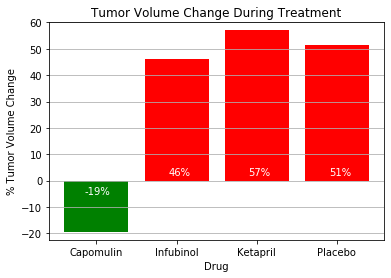

In [17]:
# Generate the Bar Plot - Capomulin, Infubinol, Ketapril, and Placebo
plt.bar(pct_change['Drug'],pct_change['Percent Change'],color=['g','r','r','r'])

plt.xlabel('Drug')
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Volume Change During Treatment')
plt.ylim(min(pct_change['Percent Change'])-3,max(pct_change['Percent Change'])+3)
plt.grid(axis='y')

plt.annotate('-19%',(-0.15,-5),color='w')
plt.annotate('46%',(0.9,2),color='w')
plt.annotate('57%',(1.9,2),color='w')
plt.annotate('51%',(2.9,2),color='w')

# Save the Figure
plt.savefig('Tumor Volume Change During Treatment.png')

# Show the Figure
plt.show()

## Observations
Based on the provided data on mice treated with Capomulin, Infubinol, Ketapril, and Placebo, I would like to highlight the following observations. 

Firstly, the number of metastatic sites continued to increase during the 45 days of treatment regardless of the drug regime. On average, mice treated with Capomulin had less metastatic sites at the end of the study (1.5), compared to mice treated with Infubinol, Ketapril, and Placebo (2.1, 3.4, and 3.3, respectively). 

Secondly, the survival rates of mice treated with Capomulin, Infubinol, Ketapril, and Placebo ranged from 36% to 84%. Mice treated with Capomulin had the highest survival rate; 84% of these mice survived until the end of the study.

Lastly, the average tumor volume of mice in these four drug regimes was the same at the start of the study (45mm<sup>3</sup>). By the end of the study, the tumor volume of mice treated with Infubinol, Ketapril, and Placebo had increased by 46%, 57%, and 51%, respectively. In contrast, the tumor volume of mice treated with Capomulin had decreased by 19%.